In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('/Users/yufangwang/Downloads/movie_ratings_v.csv')
df

,Movie,Year_Release,IMDB_Ratings,Metascore,Votes,Gross,RT,Budget,US_Box_Office_2,Worldwide_Box_Office,W_BO_percentage_change,US_BO_percentage_change,BO_per_budget
0,Iron Man,2008,7.9,79,837642,318412101.0,0.93,186000000,318604126,585171547,0.000000,0.000000,0.000000
1,The Incredible Hulk,2008,6.9,61,389173,134520000.0,0.67,137500000,134806913,265573859,-0.546161,-0.576883,1.931446
2,Iron Man 2,2010,7.0,57,637214,312430000.0,0.73,170000000,312433331,621156389,1.338921,1.317636,3.653861
3,Thor,2011,7.0,57,661506,181030000.0,0.77,150000000,181030624,449326618,-0.276629,-0.420578,2.995511
4,Captain America: The First Avenger,2011,6.9,66,641089,176650000.0,0.80,140000000,176654505,370569776,-0.175277,-0.024173,2.646927
5,The Avengers,2012,8.1,69,1153918,623360000.0,0.92,225000000,623279547,1517935897,3.096222,2.528240,6.746382
6,Iron Man Three,2013,7.2,62,672054,409010000.0,0.80,200000000,408992272,1215392272,-0.199313,-0.343806,6.076961
7,Thor: The Dark World,2013,7.0,54,522872,206360000.0,0.67,150000000,206362140,644602516,-0.469634,-0.495438,4.297350
8,Captain America: The Winter Soldier,2014,7.8,70,641527,259770000.0,0.90,170000000,259746958,714401889,0.108283,0.258695,4.202364
9,Guardians of the Galaxy,2014,8.1,76,915670,333180000.0,0.91,170000000,333172112,770867516,0.079039,0.282680,4.534515


In [64]:
import seaborn as sns
sns.set_palette("RdBu_r", 7)
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


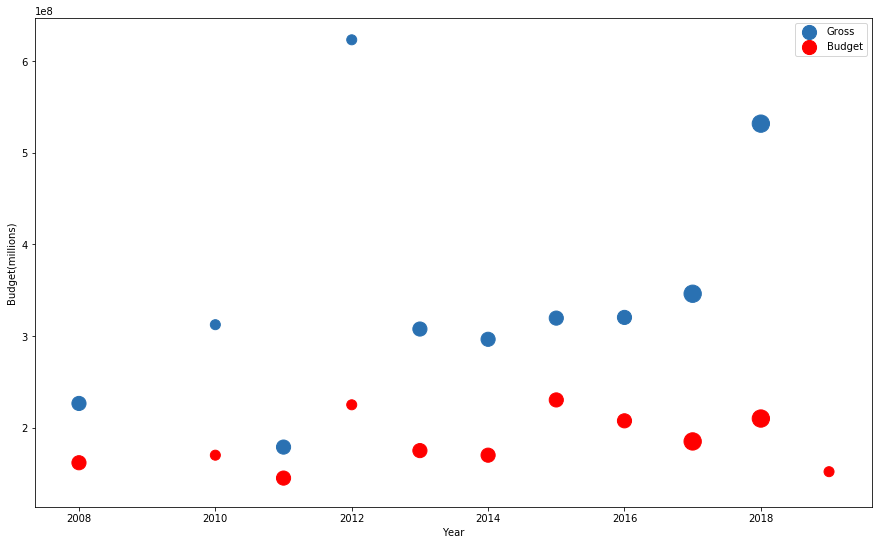

In [68]:
data_groupby_year = data.groupby(df['Year_Release'])
data_groupby_year_mean = data_groupby_year.mean()
Gross = plt.scatter(data_groupby_year_mean.index, 
                    data_groupby_year_mean["Gross"], 
                    s = data_groupby_year["Gross"].count()*100)
Budget = plt.scatter(data_groupby_year_mean.index, 
                     data_groupby_year_mean["Budget"],color = "r" ,
                     s = data_groupby_year["Budget"].count()*100)
plt.legend((Gross, Budget), ('Gross', 'Budget'),)
plt.xlabel("Year")
plt.ylabel("Budget(millions)")
plt.show()

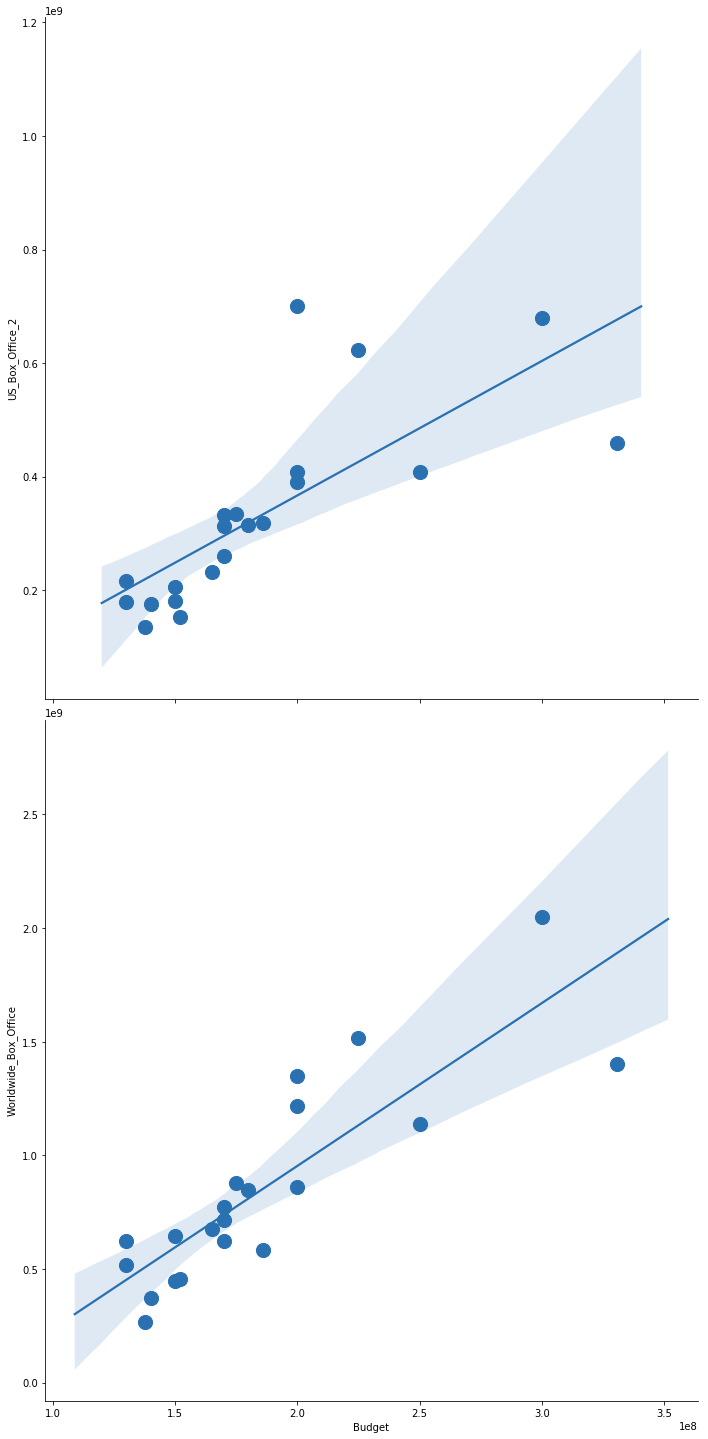

In [85]:
g1 = sns.PairGrid(df, y_vars = ['US_Box_Office_2', 'Worldwide_Box_Office'],
                 x_vars = ['Budget'], height = 10, palette="GnBu_d", hue = 'index')
g1 = g1.map(sns.regplot)
g1 = g1.map(plt.scatter, s=200)
g1

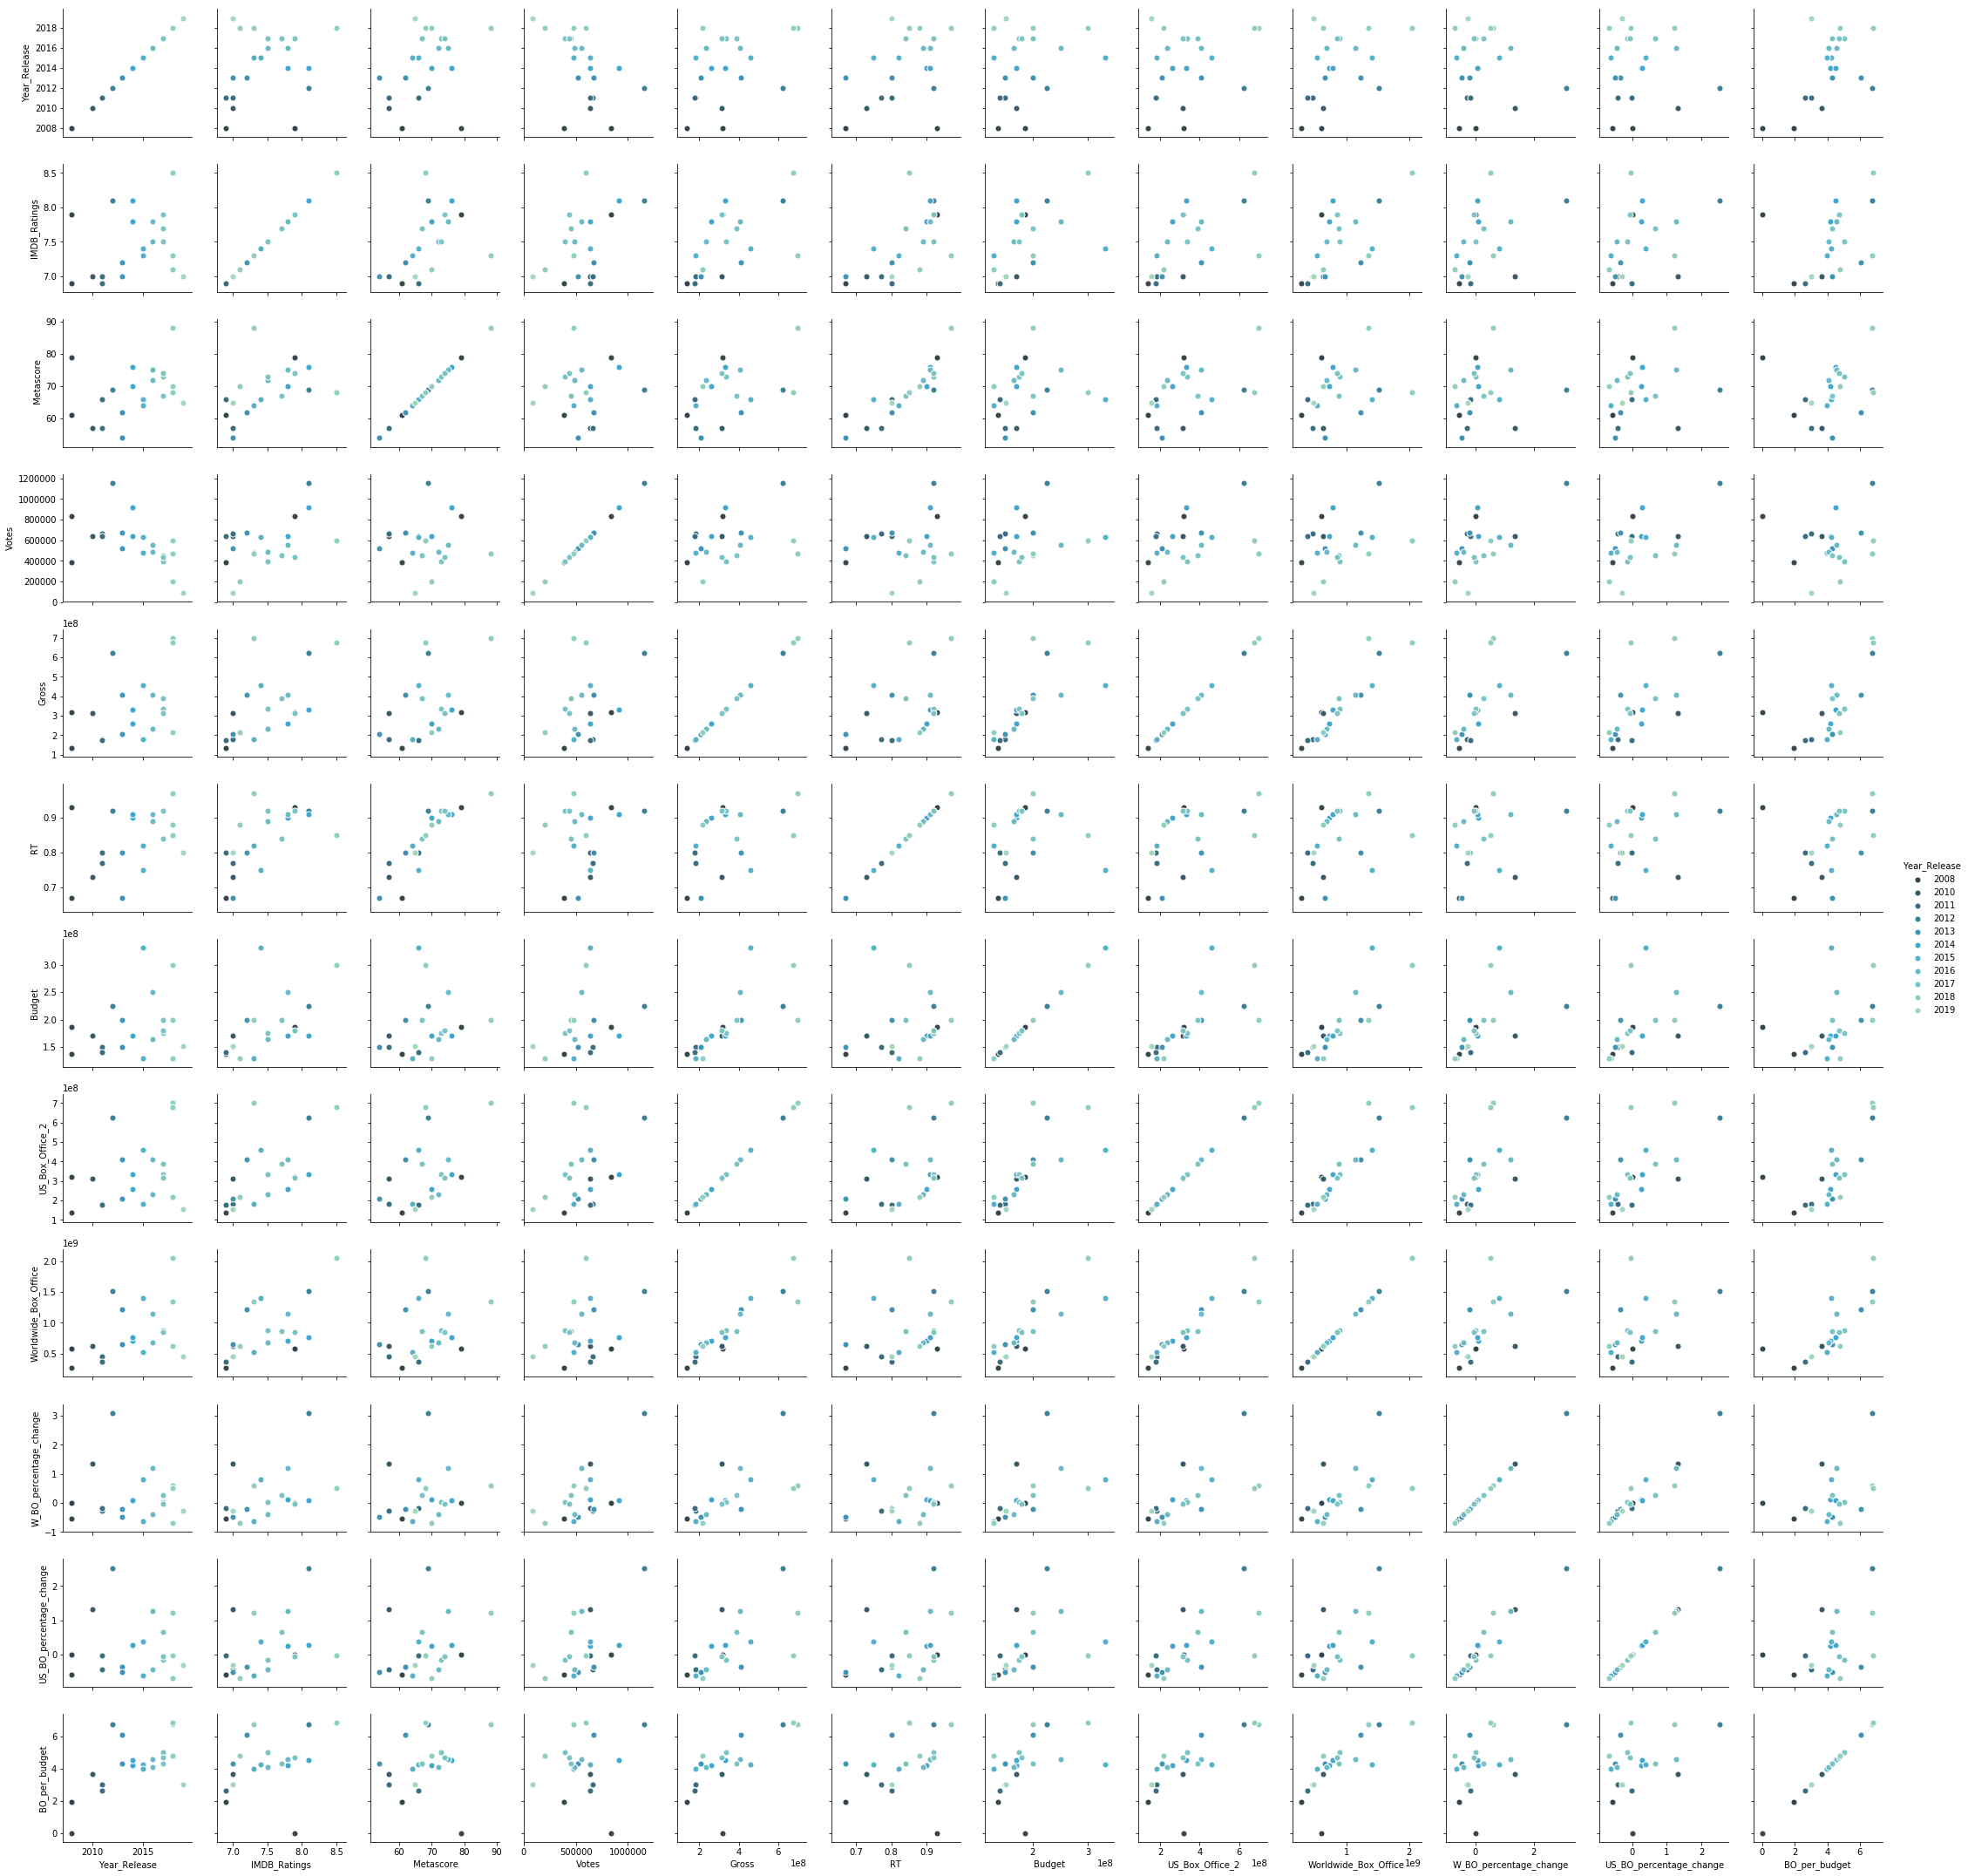

In [87]:
g2 = sns.PairGrid(df, hue="Year_Release", palette="GnBu_d")
g2.map(plt.scatter, s=50, edgecolor="white")
g2.add_legend()

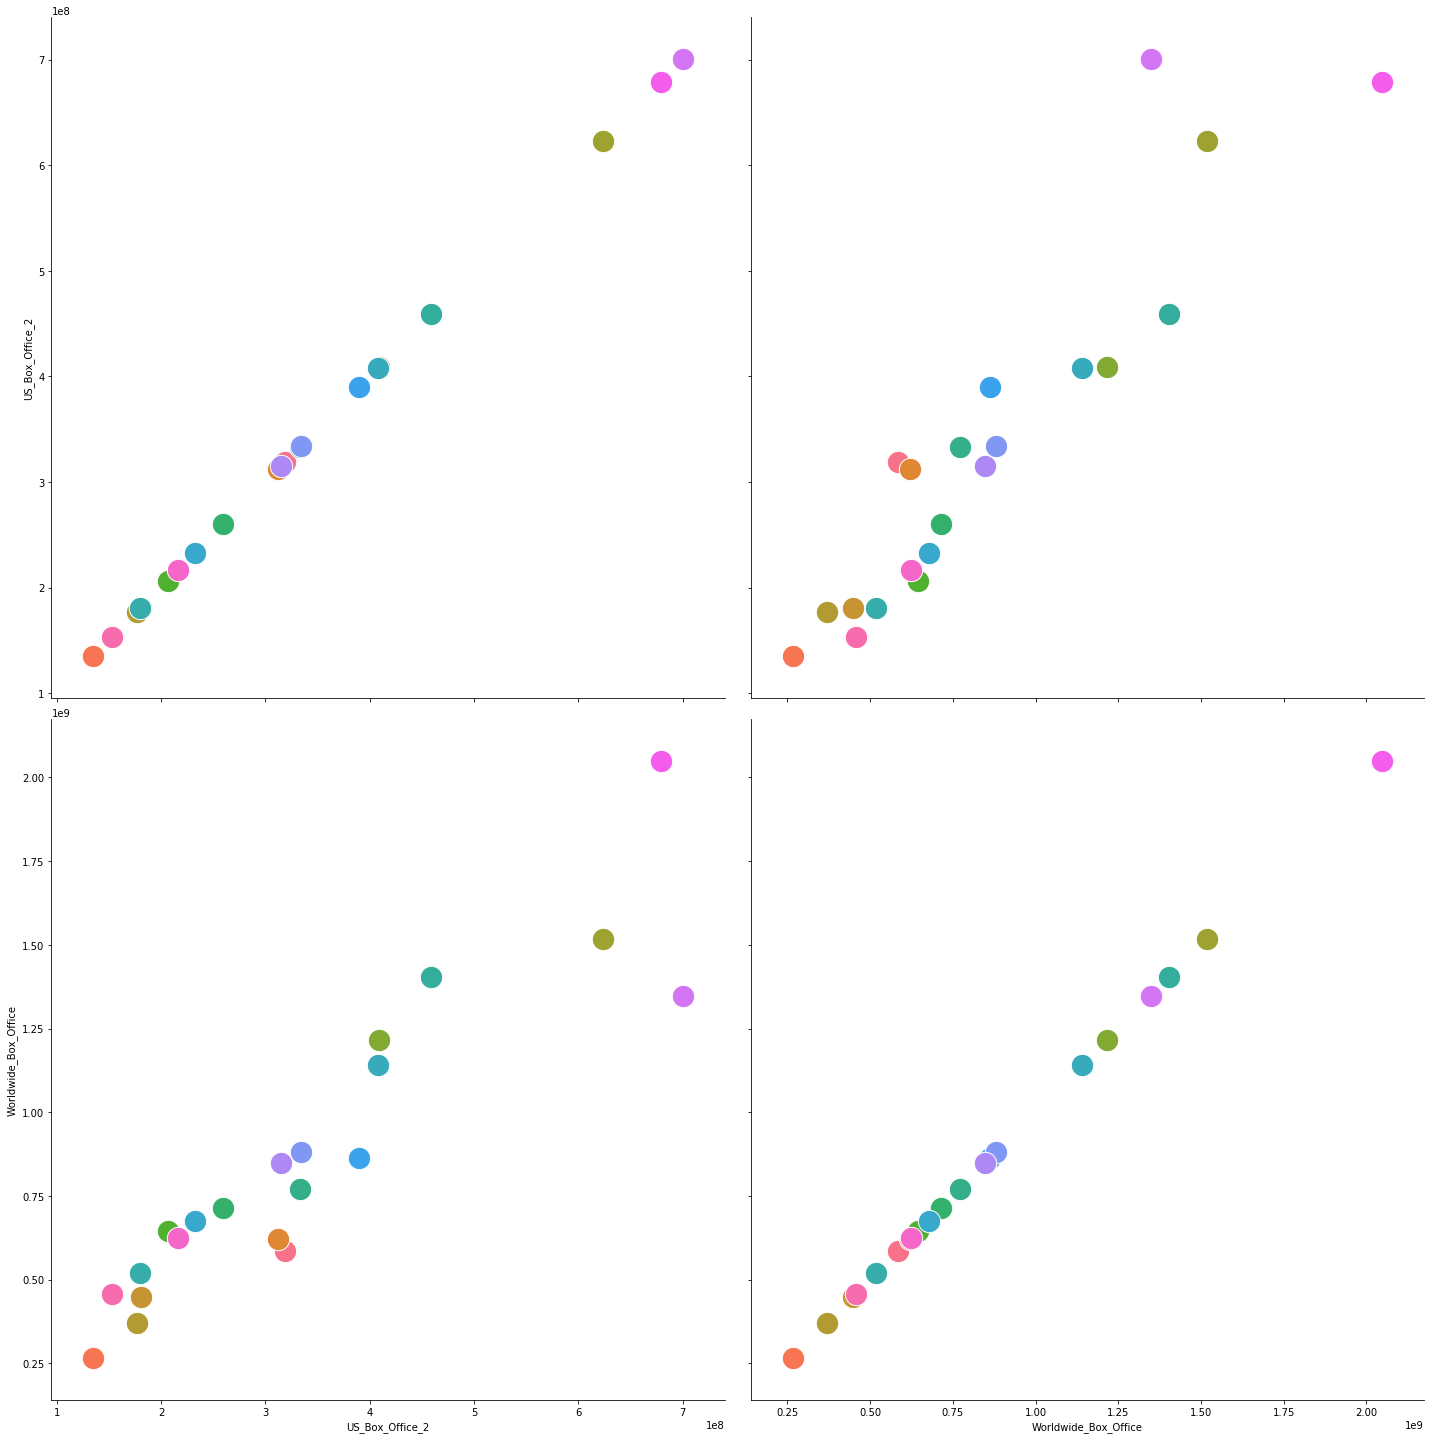

In [115]:
g4 = sns.PairGrid(df, vars=['US_Box_Office_2', 'Worldwide_Box_Office'], hue = 'Movie', palette='husl',height = 10)
g4 = g4.map(plt.scatter, edgecolor = 'white', s = 500)

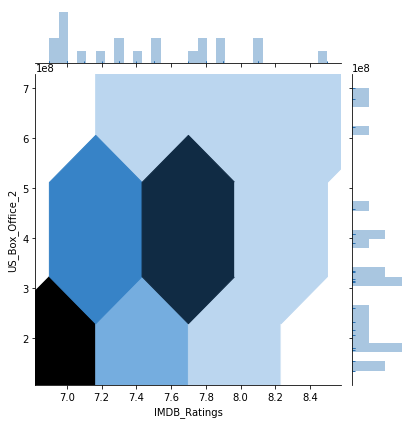

In [117]:
sns.jointplot(x=df['IMDB_Ratings'], y=df['US_Box_Office_2'], kind='hex', marginal_kws=dict(bins=30, rug=True))


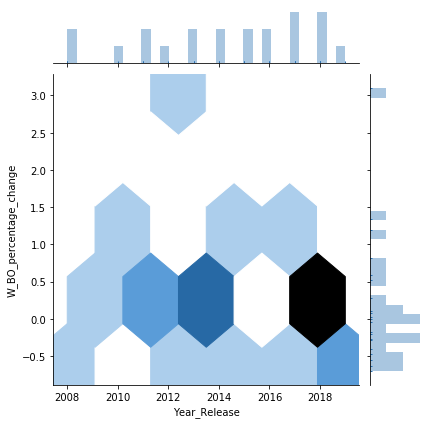

In [121]:
sns.jointplot(x=df['Year_Release'], y=df['W_BO_percentage_change'], kind='hex', marginal_kws=dict(bins=30, rug=True))


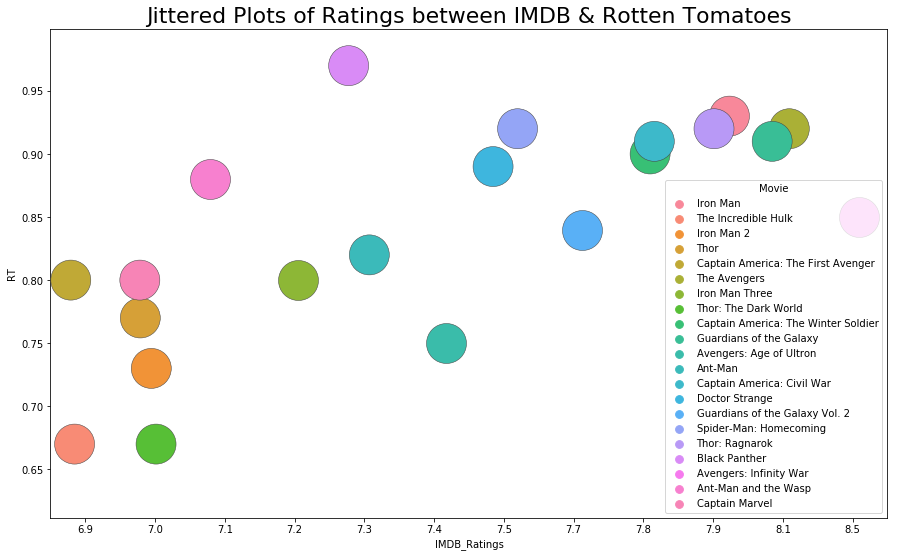

In [150]:
sns.stripplot(df.IMDB_Ratings, df.RT, jitter=0.25, size=40, hue = data['Movie'],linewidth=.5)
plt.title('Jittered Plots of Ratings between IMDB & Rotten Tomatoes', fontsize=22)
plt.show()

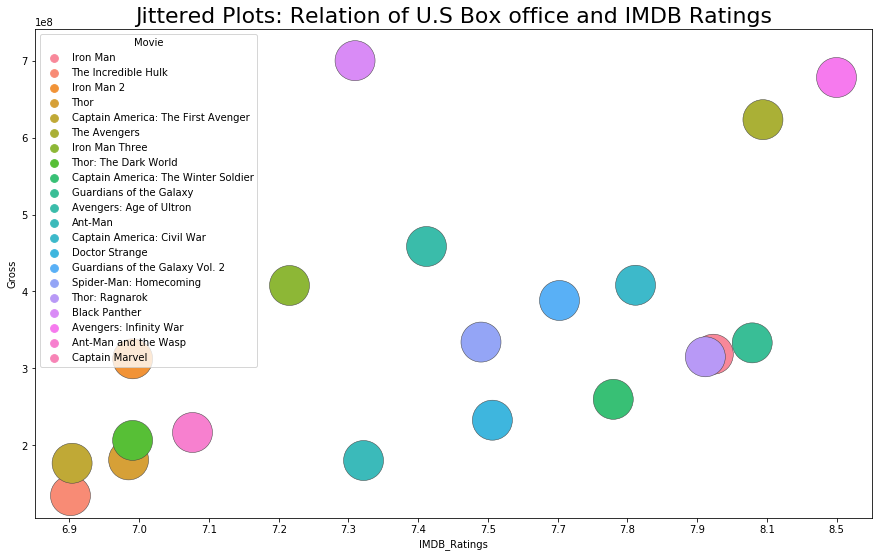

In [156]:
sns.stripplot(df.IMDB_Ratings, df.Gross, jitter=0.25, size=40, hue = data['Movie'],linewidth=.5)
plt.title('Jittered Plots: Relation of U.S Box office and IMDB Ratings', fontsize=22)
plt.show()